In [1]:
# Importing all required libraries for the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, accuracy_score,precision_score,recall_score,f1_score,roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

/home/7311c78e-b981-4ce2-b34a-27c0bb38758e/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Loading the breast cancer dataset from sklearn
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Creating DataFrame for easier data exploration
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['diagnosis'] = df['target'].map({0: 'Malignant', 1: 'Benign'})


In [3]:
# Displaying basic dataset information
print(f"Dataset: Breast Cancer Wisconsin")
print(f"Shape: {df.shape}")
print(f"Features: {len(feature_names)}")
print(f"Target classes: {df['diagnosis'].unique()}")
print("\nClass distribution:")
print(df['diagnosis'].value_counts())
display(df.head())

Dataset: Breast Cancer Wisconsin
Shape: (569, 32)
Features: 30
Target classes: ['Malignant' 'Benign']

Class distribution:
diagnosis
Benign       357
Malignant    212
Name: count, dtype: int64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,Malignant


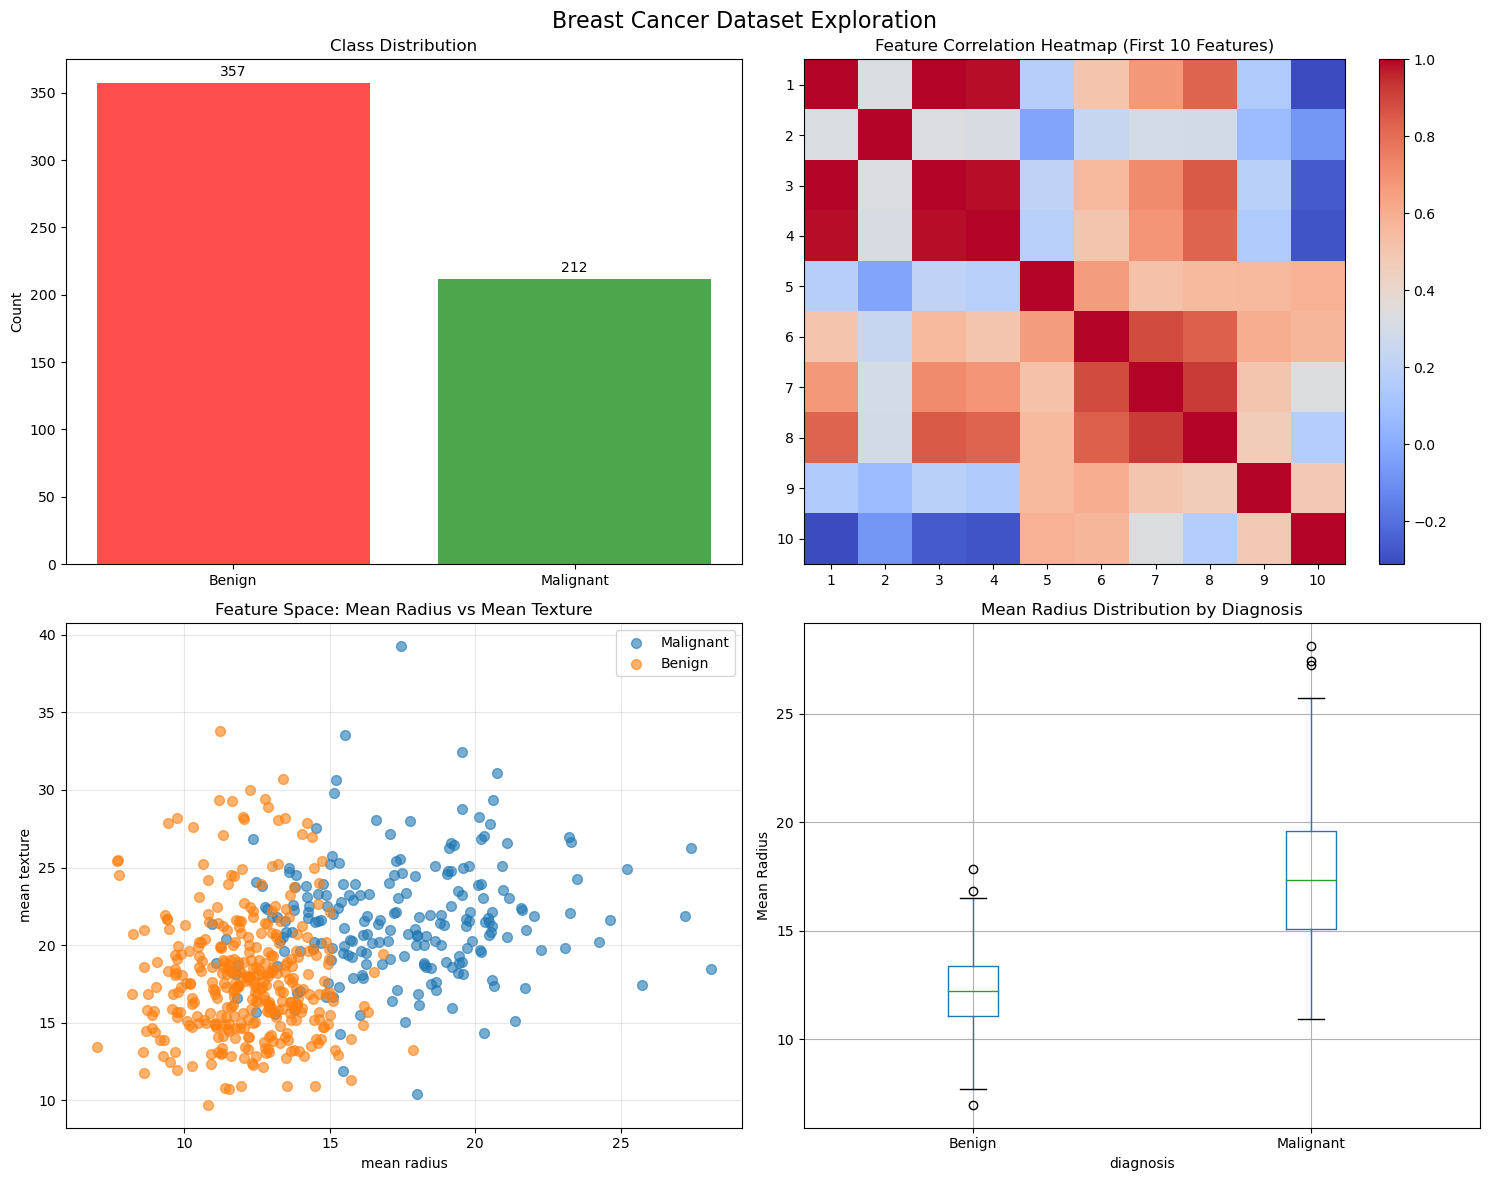

In [4]:
# Setting up the plotting style for better visualization
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plotting class distribution using bar chart
class_counts = df['diagnosis'].value_counts()
axes[0,0].bar(class_counts.index, class_counts.values, color=['red', 'green'], alpha=0.7)
axes[0,0].set_title('Class Distribution')
axes[0,0].set_ylabel('Count')
for i, v in enumerate(class_counts.values):
    axes[0,0].text(i, v + 3, str(v), ha='center', va='bottom')

# Creating correlation heatmap for the first 10 features
correlation = df[feature_names[:10]].corr()
im = axes[0,1].imshow(correlation, cmap='coolwarm', aspect='auto')
axes[0,1].set_title('Feature Correlation Heatmap (First 10 Features)')
plt.colorbar(im, ax=axes[0,1])
axes[0,1].set_xticks(range(10))
axes[0,1].set_yticks(range(10))
axes[0,1].set_xticklabels(range(1, 11))
axes[0,1].set_yticklabels(range(1, 11))

# Creating scatter plot showing feature distributions by class
feature1, feature2 = 'mean radius', 'mean texture'
for diagnosis in ['Malignant', 'Benign']:
    subset = df[df['diagnosis'] == diagnosis]
    axes[1,0].scatter(subset[feature1], subset[feature2], 
                     label=diagnosis, alpha=0.6, s=50)
axes[1,0].set_xlabel(feature1)
axes[1,0].set_ylabel(feature2)
axes[1,0].set_title('Feature Space: Mean Radius vs Mean Texture')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Creating box plot to show distribution of mean radius by diagnosis
df.boxplot(column='mean radius', by='diagnosis', ax=axes[1,1])
axes[1,1].set_title('Mean Radius Distribution by Diagnosis')
axes[1,1].set_ylabel('Mean Radius')

plt.suptitle('Breast Cancer Dataset Exploration', fontsize=16)
plt.tight_layout()
plt.show()

In [5]:
# Preparing features and target variables for modeling
X = df[feature_names]
y = df['target']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training class distribution:")
print(pd.Series(y_train).value_counts())

# Applying SMOTE to handle class imbalance in the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("After SMOTE application:")
print(f"Training set shape: {X_train_smote.shape}")
print(f"Training class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# Scaling features using StandardScaler for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

print(f"Scaled training set shape: {X_train_scaled.shape}")
print(f"Scaled test set shape: {X_test_scaled.shape}")


Training set shape: (455, 30)
Test set shape: (114, 30)
Training class distribution:
target
1    285
0    170
Name: count, dtype: int64
After SMOTE application:
Training set shape: (570, 30)
Training class distribution after SMOTE:
target
1    285
0    285
Name: count, dtype: int64
Scaled training set shape: (570, 30)
Scaled test set shape: (114, 30)


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(


In [6]:
# Defining all supervised learning models to be trained
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis()
}

# Creating dictionary to store training results
results = {}
print("Training 5 supervised learning models...")
print("-" * 50)

# Training each model and storing results
for name, model in models.items():
    print(f"Training {name}...")
    
    # Training model on scaled data
    model.fit(X_train_scaled, y_train_smote)
    
    # Making predictions and probability estimates
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calculating performance metrics using sklearn functions
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    
    # Calculating confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Storing all results for this model
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'fpr': fpr,
        'tpr': tpr,
        'thresholds': thresholds,
        'confusion_matrix': cm
    }
    
    print(f" {name}: Accuracy = {accuracy:.3f}, Precision = {precision:.3f}, Recall = {recall:.3f}, F1 = {f1:.3f}, ROC-AUC = {roc_auc:.3f}")



Training 5 supervised learning models...
--------------------------------------------------
Training Logistic Regression...
 Logistic Regression: Accuracy = 0.965, Precision = 0.986, Recall = 0.958, F1 = 0.972, ROC-AUC = 0.996
Training Support Vector Machine...
 Support Vector Machine: Accuracy = 0.982, Precision = 0.986, Recall = 0.986, F1 = 0.986, ROC-AUC = 0.995
Training Decision Tree...
 Decision Tree: Accuracy = 0.930, Precision = 0.957, Recall = 0.931, F1 = 0.944, ROC-AUC = 0.922
Training Random Forest...
 Random Forest: Accuracy = 0.947, Precision = 0.971, Recall = 0.944, F1 = 0.958, ROC-AUC = 0.993
Training Linear Discriminant Analysis...
 Linear Discriminant Analysis: Accuracy = 0.965, Precision = 0.959, Recall = 0.986, F1 = 0.973, ROC-AUC = 0.991


Detailed confusion matrix and metrics for each model:


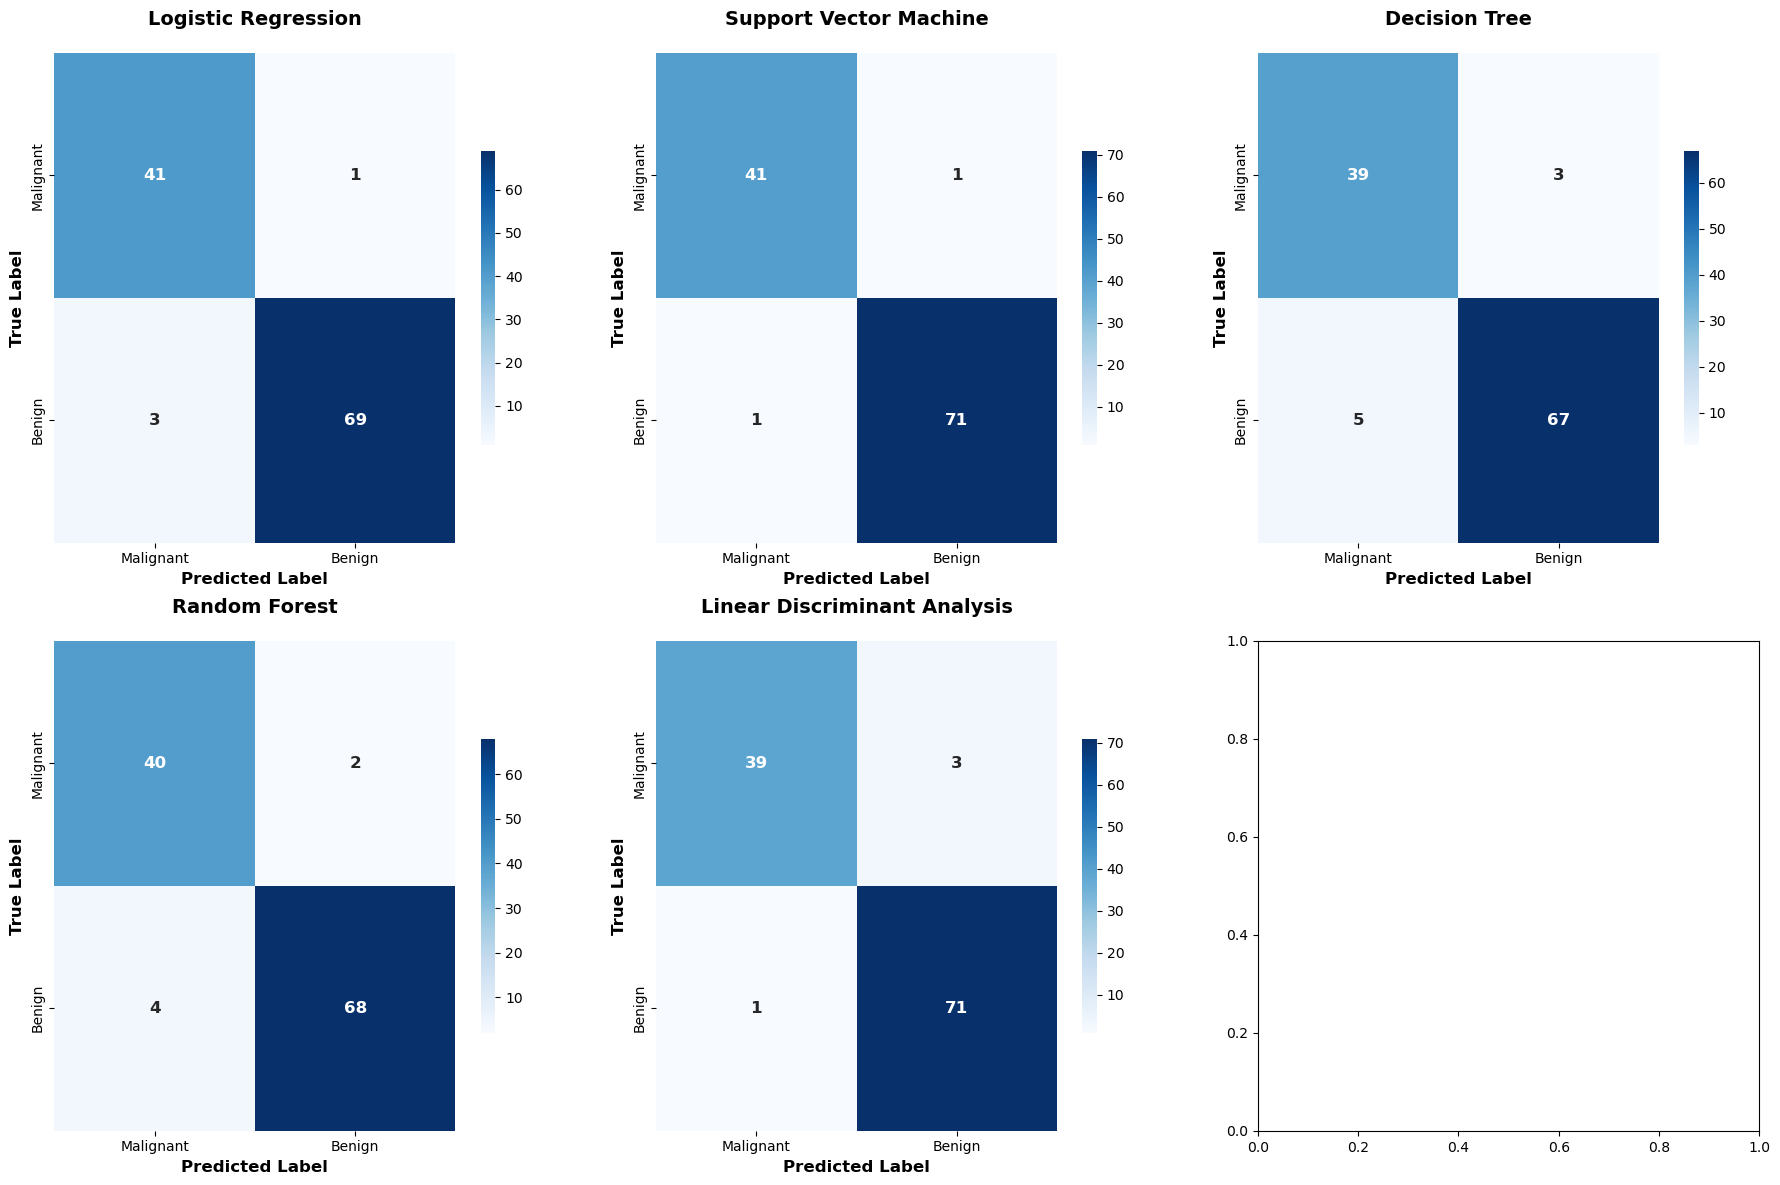

In [10]:
# Creating individual confusion matrices for each model with detailed metrics
print("Detailed confusion matrix and metrics for each model:")

# Setting up the subplot grid with more vertical space
fig, axes = plt.subplots(2, 3, figsize=(22, 14))
axes = axes.ravel()

# Plotting confusion matrix for each model with metrics
for i, (name, result) in enumerate(results.items()):
    cm = result['confusion_matrix']
    
    # Creating heatmap for confusion matrix with better spacing
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['Malignant', 'Benign'], 
                yticklabels=['Malignant', 'Benign'
                cbar_kws={'shrink': 0.6},
                annot_kws={'size': 12, 'weight': 'bold'})
    
    axes[i].set_title(f'{name}', fontsize=14, pad=20, weight='bold')
    axes[i].set_xlabel('Predicted Label', fontsize=12, weight='bold')
    axes[i].set_ylabel('True Label', fontsize=12, weight='bold')
    
    # Adding performance metrics to the plot with better formatting
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    # Creating detailed metrics text with better organization
    textstr = '\n'.join([
        'PERFORMANCE METRICS:',
        '=' * 20,
        f'Accuracy:    {result["accuracy"]:.3f}',
        f'Precision:   {result["precision"]:.3f}',
        f'Recall:      {result["recall"]:.3f}',
        f'F1-Score:    {result["f1_score"]:.3f}',
        f'ROC-AUC:     {result["roc_auc"]:.3f}',
        f'Specificity: {specificity:.3f}',
        '',
        'CONFUSION MATRIX:',
        '=' * 20,
        f'TN: {tn:2d}    FP: {fp:2d}',
        f'FN: {fn:2d}    TP: {tp:2d}'
    ])
    

    

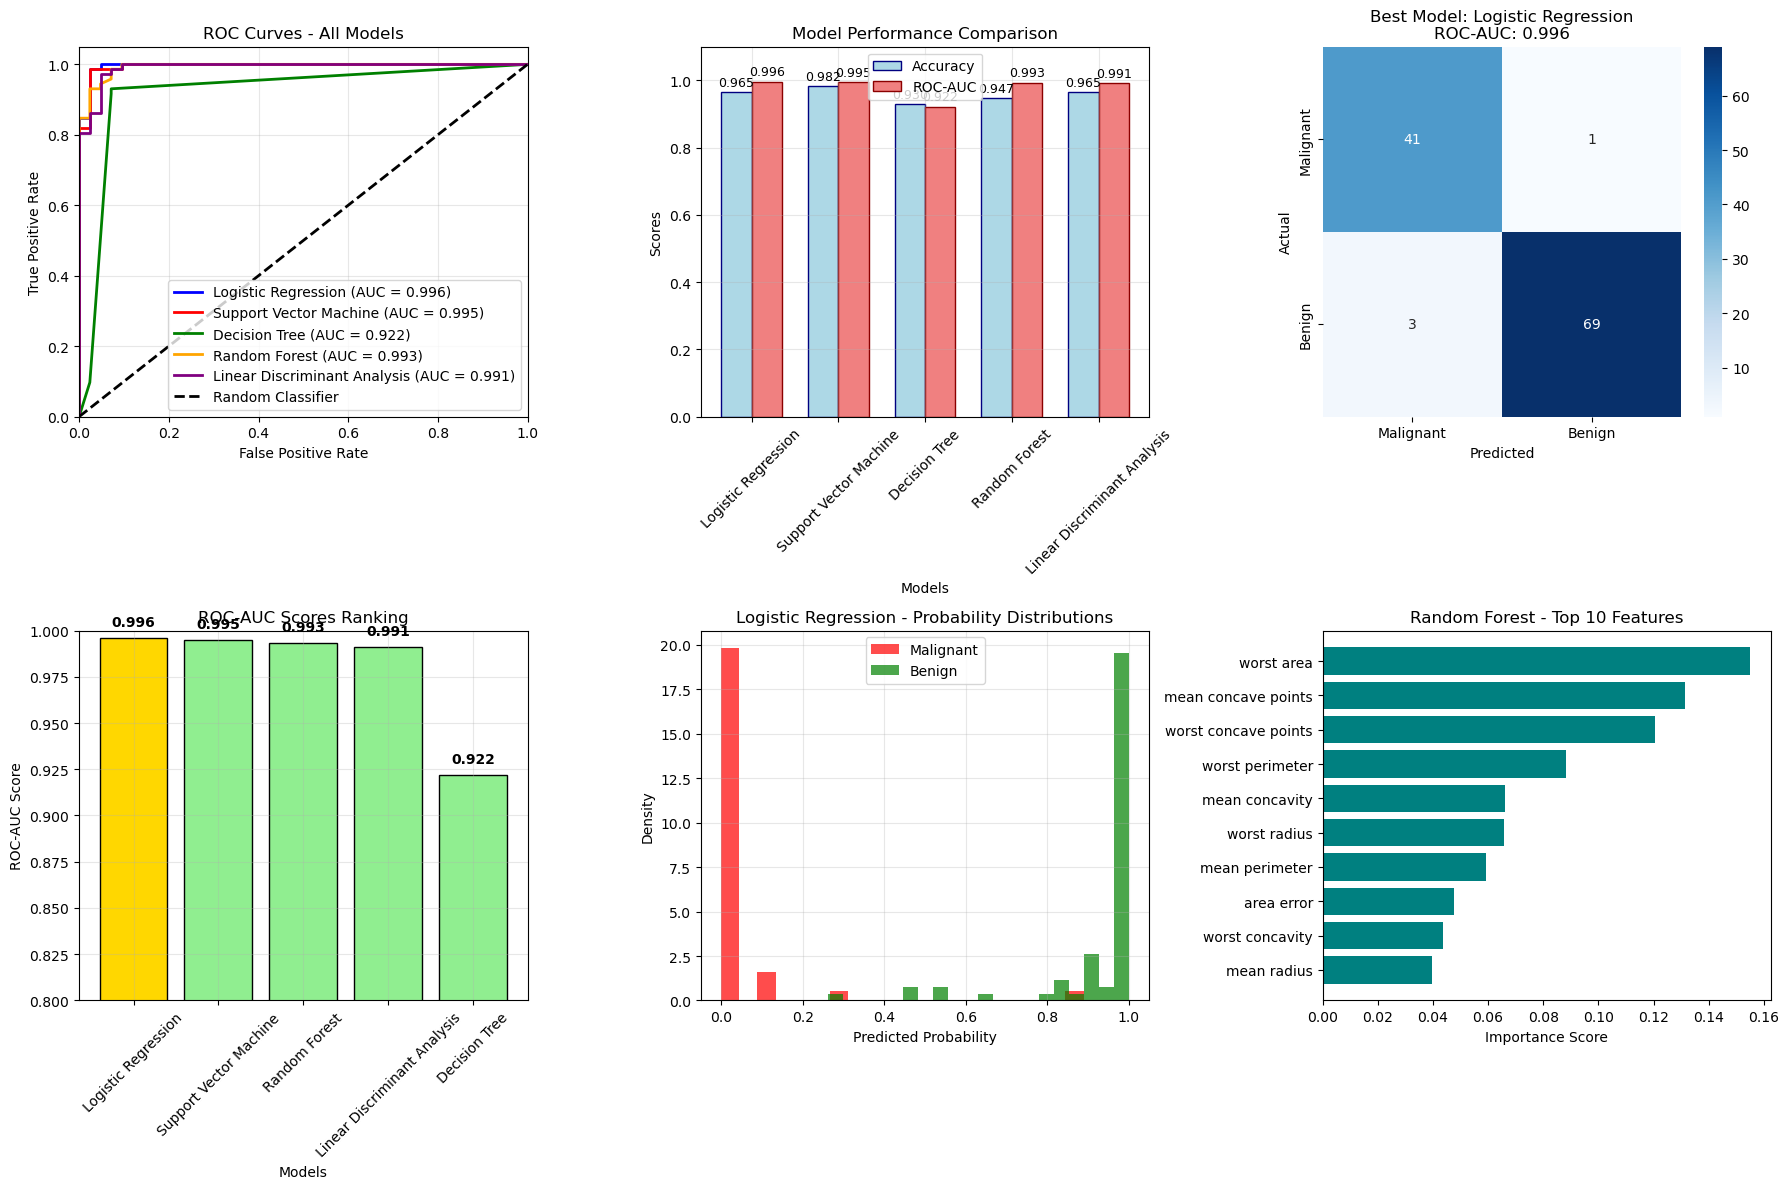

In [8]:
# Creating comprehensive visualization dashboard for model results
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plotting ROC Curves for all models
colors = ['blue', 'red', 'green', 'orange', 'purple']
for i, (name, result) in enumerate(results.items()):
    axes[0,0].plot(result['fpr'], result['tpr'], color=colors[i], lw=2,
                  label=f'{name} (AUC = {result["roc_auc"]:.3f})')

axes[0,0].plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
axes[0,0].set_xlim([0.0, 1.0])
axes[0,0].set_ylim([0.0, 1.05])
axes[0,0].set_xlabel('False Positive Rate')
axes[0,0].set_ylabel('True Positive Rate')
axes[0,0].set_title('ROC Curves - All Models')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Plotting Accuracy and ROC-AUC comparison across models
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]
roc_aucs = [results[name]['roc_auc'] for name in model_names]

x = np.arange(len(model_names))
width = 0.35

bars1 = axes[0,1].bar(x - width/2, accuracies, width, label='Accuracy', 
                     color='lightblue', edgecolor='navy')
bars2 = axes[0,1].bar(x + width/2, roc_aucs, width, label='ROC-AUC', 
                     color='lightcoral', edgecolor='darkred')

axes[0,1].set_xlabel('Models')
axes[0,1].set_ylabel('Scores')
axes[0,1].set_title('Model Performance Comparison')
axes[0,1].set_xticks(x)
axes[0,1].set_xticklabels(model_names, rotation=45)
axes[0,1].legend()
axes[0,1].set_ylim(0, 1.1)
axes[0,1].grid(True, alpha=0.3)

# Adding numerical values on top of bars for clarity
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0,1].text(bar.get_x() + bar.get_width()/2, height + 0.01,
                      f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# Plotting Confusion Matrix for the Best Performing Model
best_model_name = max(results.keys(), key=lambda x: results[x]['roc_auc'])
best_model = results[best_model_name]
cm = confusion_matrix(y_test, best_model['predictions'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,2],
           xticklabels=['Malignant', 'Benign'], 
           yticklabels=['Malignant', 'Benign'])
axes[0,2].set_title(f'Best Model: {best_model_name}\nROC-AUC: {best_model["roc_auc"]:.3f}')
axes[0,2].set_xlabel('Predicted')
axes[0,2].set_ylabel('Actual')

# Plotting ROC-AUC Scores Ranking in descending order
models_sorted = sorted(results.keys(), key=lambda x: results[x]['roc_auc'], reverse=True)
auc_scores = [results[name]['roc_auc'] for name in models_sorted]

bars = axes[1,0].bar(models_sorted, auc_scores,
                    color=['gold' if x == best_model_name else 'lightgreen' for x in models_sorted],
                    edgecolor='black')
axes[1,0].set_xlabel('Models')
axes[1,0].set_ylabel('ROC-AUC Score')
axes[1,0].set_title('ROC-AUC Scores Ranking')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].set_ylim(0.8, 1.0)
axes[1,0].grid(True, alpha=0.3)

# Adding AUC values on bars for easy reading
for bar, auc_val in zip(bars, auc_scores):
    axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                  f'{auc_val:.3f}', ha='center', va='bottom', fontweight='bold')

# Plotting Probability Distributions for the Best Model
malignant_probs = best_model['probabilities'][y_test == 0]
benign_probs = best_model['probabilities'][y_test == 1]

axes[1,1].hist(malignant_probs, bins=20, alpha=0.7, color='red', 
               label='Malignant', density=True)
axes[1,1].hist(benign_probs, bins=20, alpha=0.7, color='green', 
               label='Benign', density=True)
axes[1,1].set_xlabel('Predicted Probability')
axes[1,1].set_ylabel('Density')
axes[1,1].set_title(f'{best_model_name} - Probability Distributions')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# Plotting Feature Importance from Random Forest
if 'Random Forest' in results:
    rf_model = results['Random Forest']['model']
    feature_importance = rf_model.feature_importances_
    
    # Creating DataFrame and selecting top 10 important features
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importance
    }).sort_values('importance', ascending=True).tail(10)
    
    axes[1,2].barh(importance_df['feature'], importance_df['importance'], color='teal')
    axes[1,2].set_xlabel('Importance Score')
    axes[1,2].set_title('Random Forest - Top 10 Features')
else:
    axes[1,2].text(0.5, 0.5, 'Feature Importance\n(Random Forest)', 
                  ha='center', va='center', transform=axes[1,2].transAxes)
    axes[1,2].set_title('Feature Importance')

plt.tight_layout()
plt.show()

Performance metrics for all models:


,Model,Accuracy,ROC-AUC
0,Logistic Regression,0.964912,0.996032
1,Support Vector Machine,0.982456,0.994709
3,Random Forest,0.947368,0.993221
4,Linear Discriminant Analysis,0.964912,0.991071
2,Decision Tree,0.929825,0.921627



=== BEST MODEL IDENTIFIED ===
Model: Logistic Regression
ROC-AUC Score: 0.996
Accuracy: 0.965

=== DETAILED ROC ANALYSIS FOR LOGISTIC REGRESSION ===
Optimal Classification Threshold: 0.465
True Positive Rate at optimal: 0.986
False Positive Rate at optimal: 0.024


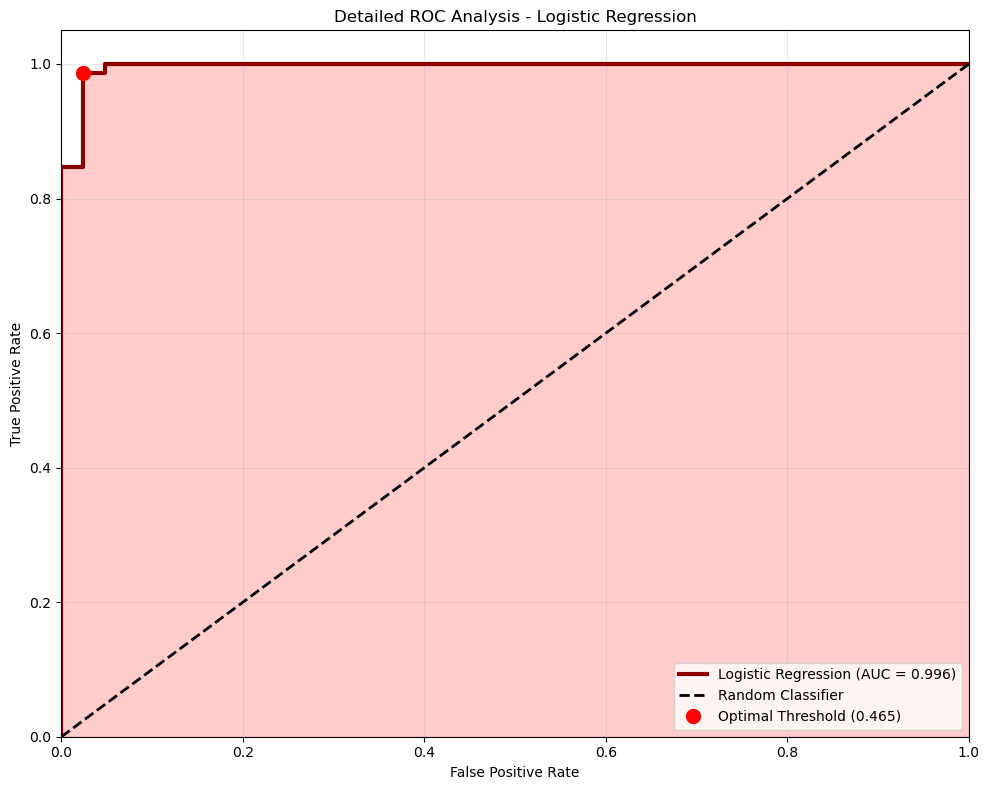


=== CLASSIFICATION REPORT FOR Logistic Regression ===
              precision    recall  f1-score   support

   Malignant       0.93      0.98      0.95        42
      Benign       0.99      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [14]:
# Creating comprehensive results DataFrame for all models
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results],
    'ROC-AUC': [results[name]['roc_auc'] for name in results]
}).sort_values('ROC-AUC', ascending=False)

print("Performance metrics for all models:")
print("=" * 50)
display(results_df)

print(f"\n=== BEST MODEL IDENTIFIED ===")
print(f"Model: {best_model_name}")
print(f"ROC-AUC Score: {best_model['roc_auc']:.3f}")
print(f"Accuracy: {best_model['accuracy']:.3f}")

# Performing detailed ROC analysis for the best model
print(f"\n=== DETAILED ROC ANALYSIS FOR {best_model_name.upper()} ===")
best_fpr = best_model['fpr']
best_tpr = best_model['tpr']
best_thresholds = best_model['thresholds']
# Calculating optimal threshold using Youden's J statistic
youden_j = best_tpr - best_fpr
optimal_idx = np.argmax(youden_j)
optimal_threshold = best_thresholds[optimal_idx]

print(f"Optimal Classification Threshold: {optimal_threshold:.3f}")
print(f"True Positive Rate at optimal: {best_tpr[optimal_idx]:.3f}")
print(f"False Positive Rate at optimal: {best_fpr[optimal_idx]:.3f}")

# Plotting detailed ROC curve for the best model
plt.figure(figsize=(10, 8))
plt.plot(best_fpr, best_tpr, color='darkred', lw=3, 
         label=f'{best_model_name} (AUC = {best_model["roc_auc"]:.3f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
plt.plot(best_fpr[optimal_idx], best_tpr[optimal_idx], 'ro', markersize=10,
         label=f'Optimal Threshold ({optimal_threshold:.3f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Detailed ROC Analysis - {best_model_name}')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.fill_between(best_fpr, best_tpr, alpha=0.2, color='red')
plt.tight_layout()
plt.show()

# Generating classification report for the best model
from sklearn.metrics import classification_report
print(f"\n=== CLASSIFICATION REPORT FOR {best_model_name} ===")
print(classification_report(y_test, best_model['predictions'], 
                           target_names=['Malignant', 'Benign']))